In [3]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
np.random.seed(0)

In [4]:
#One-factor CFM MC simulation
def One_factor_CFM(tau, Tenor, fwd_vol, N_sim):
    #Setup time index and tau
    M = int(Tenor/tau) #Number of steps

    #Start forward rate (Calc first stem from f(0,T_i))
    FR_0 =  np.exp(-0.03) #constant
    print("FR_0=", FR_0)
    
    # Create a 3D array to store all simulation paths
    FR_mc = np.zeros((M, M, N_sim))
    for n in range(N_sim):
        if n % 1000 == 0:
            print("n=", n)
        
        FR=np.zeros((M,M)) #M=N=k+1
        FR[:,0] = FR_0
        for t in range(M):#t=0,1,2,...,M thus M-1 forward rates
            dW=np.random.standard_normal()
            for k in range(t+1,M):#t<=T_k
                drift = fwd_vol[k]* sum(tau  * fwd_vol[j]*1  for j in range(k, M+1)) #M+1
                FR[k][t+1]=FR[k][t]*np.exp((drift-0.5*fwd_vol[k]**2*tau)*tau - fwd_vol[k]*np.sqrt(tau)*dW)
                
        FR_mc[:, :, n] = FR 

    return FR_mc
timetoend = 12#24
lenCFM = timetoend-1
tau = 1
FR_vol = np.zeros(timetoend) + 0.1 #constant volatility

CFM3D = One_factor_CFM(1, int(lenCFM), FR_vol, 200000)
print("CFM model results", CFM3D.shape)
CFM_mean = np.mean(CFM3D, axis=2)
print("CFM model mean results", CFM_mean)

FR_0= 0.9704455335485082
n= 0
n= 1000
n= 2000
n= 3000
n= 4000
n= 5000
n= 6000
n= 7000
n= 8000
n= 9000
n= 10000
n= 11000
n= 12000
n= 13000
n= 14000
n= 15000
n= 16000
n= 17000
n= 18000
n= 19000
n= 20000
n= 21000
n= 22000
n= 23000
n= 24000
n= 25000
n= 26000
n= 27000
n= 28000
n= 29000
n= 30000
n= 31000
n= 32000
n= 33000
n= 34000
n= 35000
n= 36000
n= 37000
n= 38000
n= 39000
n= 40000
n= 41000
n= 42000
n= 43000
n= 44000
n= 45000
n= 46000
n= 47000
n= 48000
n= 49000
n= 50000
n= 51000
n= 52000
n= 53000
n= 54000
n= 55000
n= 56000
n= 57000
n= 58000
n= 59000
n= 60000
n= 61000
n= 62000
n= 63000
n= 64000
n= 65000
n= 66000
n= 67000
n= 68000
n= 69000
n= 70000
n= 71000
n= 72000
n= 73000
n= 74000
n= 75000
n= 76000
n= 77000
n= 78000
n= 79000
n= 80000
n= 81000
n= 82000
n= 83000
n= 84000
n= 85000
n= 86000
n= 87000
n= 88000
n= 89000
n= 90000
n= 91000
n= 92000
n= 93000
n= 94000
n= 95000
n= 96000
n= 97000
n= 98000
n= 99000
n= 100000
n= 101000
n= 102000
n= 103000
n= 104000
n= 105000
n= 106000
n= 107000
n= 10800

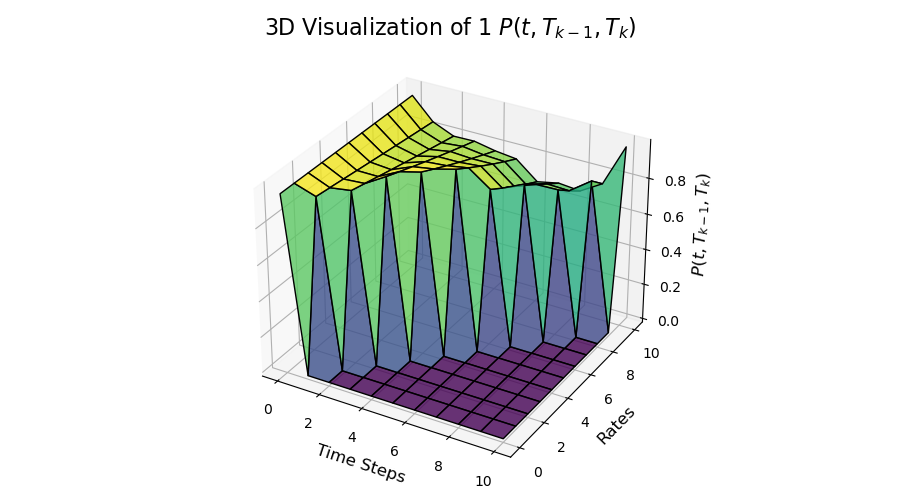

In [5]:
#Plot one factor CFM market model
num_steps = CFM_mean.shape[0]
num_rates = CFM_mean.shape[1]

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, CFM3D[:,:,1], cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title(r"3D Visualization of 1 $ P(t, T_{k-1}, T_k)$", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates", fontsize=12)
ax.set_zlabel(r"$\, P(t, T_{k-1}, T_k)$", fontsize=12)

plt.tight_layout()
plt.show()

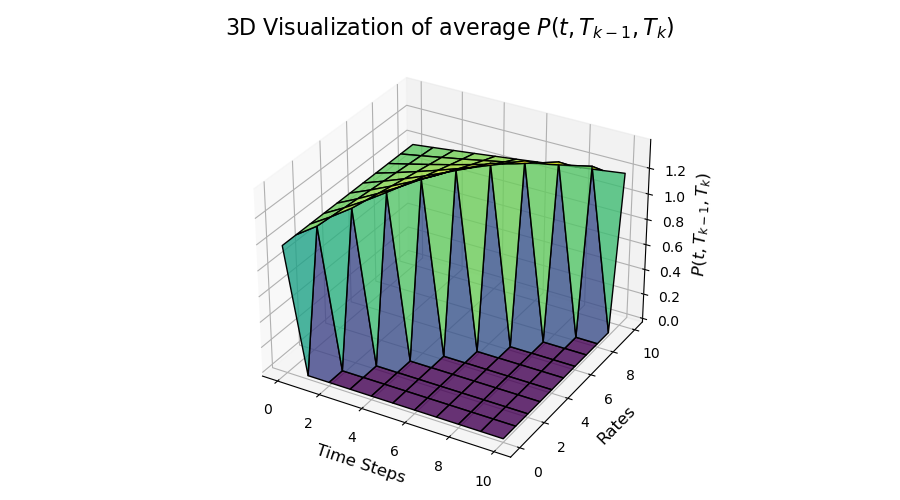

In [6]:
#Plot one factor CFM market model
num_steps = CFM_mean.shape[0]
num_rates = CFM_mean.shape[1]

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, CFM_mean, cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title(r"3D Visualization of average $ P(t, T_{k-1}, T_k)$", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates", fontsize=12)
ax.set_zlabel(r"$\, P(t, T_{k-1}, T_k)$", fontsize=12)

plt.tight_layout()
plt.show()

min and max for all 0.26130909919078305 4.86323886244554
min and max for average 0.9704455335485077 1.391134521816417


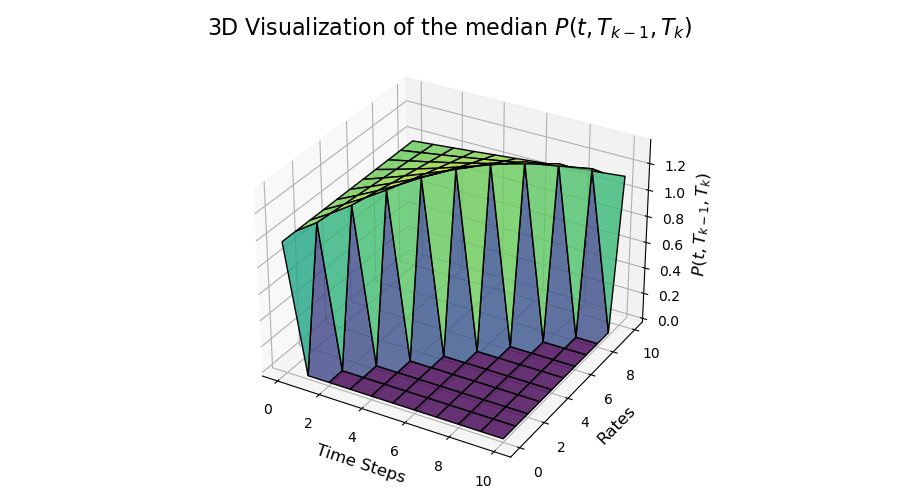

In [7]:
#max and min value
print("min and max for all", np.min(CFM3D[CFM3D>0]), np.max(CFM3D))
print("min and max for average", np.min(CFM_mean[CFM_mean>0]), np.max(CFM_mean))
CFM_median = np.median(CFM3D, axis = 2)
#Plot one factor CFM market model
num_steps = CFM_median.shape[0]
num_rates = CFM_median.shape[1]

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, CFM_median, cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title(r"3D Visualization of the median $ P(t, T_{k-1}, T_k)$", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates", fontsize=12)
ax.set_zlabel(r"$\, P(t, T_{k-1}, T_k)$", fontsize=12)

plt.tight_layout()
plt.show()

ZCB_mc (11, 200000)
[1.         0.97044553 0.94176453 0.91393119 0.88692044 0.86070798
 0.83527021 0.81058425 0.78662786 0.76337949 0.74081822]
P(0,T_k-1,T_K)= [0.97044553 0.97044553 0.97044553 0.97044553 0.97044553 0.97044553
 0.97044553 0.97044553 0.97044553 0.97044553]
True P(0,T_k-1,T_K)= [0.97044553 0.97044553 0.97044553 0.97044553 0.97044553 0.97044553
 0.97044553 0.97044553 0.97044553 0.97044553 0.97044553]
FR_k(0)= [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]


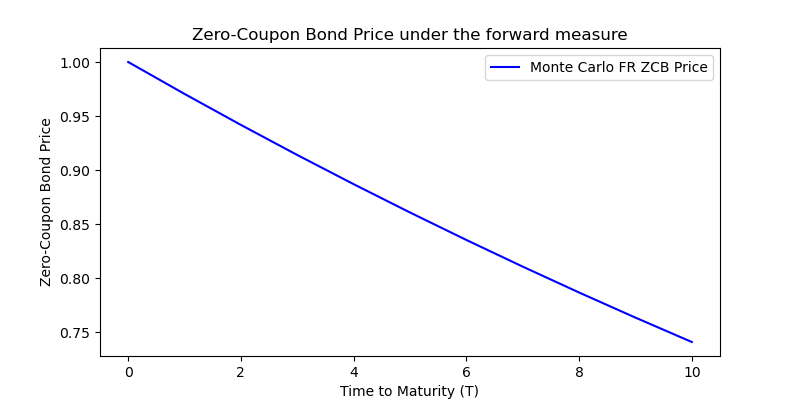

In [8]:
#Numaraire under the forward measure
def ZCB_CFM(CFM, tau):
    num_steps = CFM.shape[0]
    N_sim = CFM.shape[2]
    ZCB_mc = np.ones((num_steps, N_sim))
    for i in range(1, num_steps):
        ZCB_mc[i,:] = ZCB_mc[i-1,:] * CFM[i, 0,:]
    return ZCB_mc

ZCB_mc = ZCB_CFM(CFM3D, 1) #D(0,T)
print("ZCB_mc", ZCB_mc.shape)
ZCB_mean = np.mean(ZCB_mc, axis=1) #P(0,T)
print(ZCB_mean)

#Checks martingality
print("P(0,T_k-1,T_K)=", np.mean(ZCB_mc[1:,:]/ZCB_mc[:-1,:], axis=1))
print("True P(0,T_k-1,T_K)=", CFM_mean[:,0])
print("FR_k(0)=", -np.log(CFM_mean[:,0]))

plt.figure(figsize=(8, 4))
plt.plot(ZCB_mean, label='Monte Carlo FR ZCB Price', color="blue")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Zero-Coupon Bond Price')
plt.title('Zero-Coupon Bond Price under the forward measure') #mucurio p.208, s. 256
plt.legend()
plt.show()

P(T_k, T_M)= [11.34486282 11.69036533 10.80670519  9.10111178  7.14209696  5.33582105
  3.86725877  2.77538333  2.01277102  1.50547075  1.18462513]


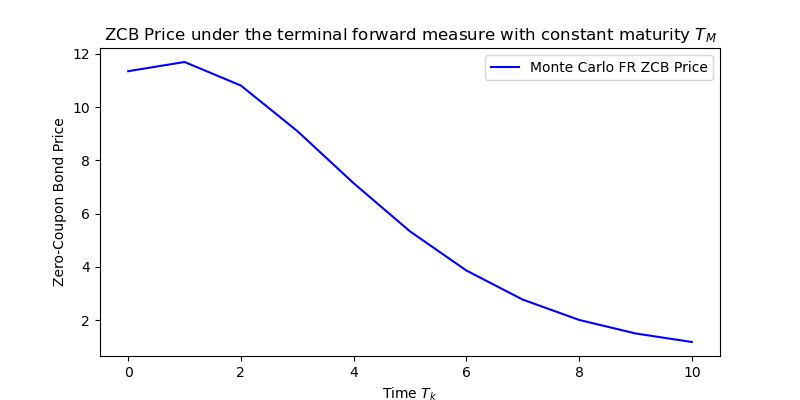

In [9]:
#P(T_k, T_M)
def ZCB_M(P, T_M):
    N_sim = P.shape[1]
    P_results = np.ones((T_M, N_sim))  
    P_results[T_M -1,:] = P[T_M -1,:]  
    for k in range(T_M - 2, -1, -1):
        P_results[k,:] = P[k,:] * P_results[k + 1, :]

    return P_results
ZCB_M_test = ZCB_M(CFM3D[-1,:,:], lenCFM)
print("P(T_k, T_M)=", np.mean(ZCB_M_test, axis=1))

plt.figure(figsize=(8, 4))
plt.plot(np.mean(ZCB_M_test,axis=1), label='Monte Carlo FR ZCB Price', color="blue")
plt.xlabel(r"Time $T_k$")
plt.ylabel('Zero-Coupon Bond Price')
plt.title(r"ZCB Price under the terminal forward measure with constant maturity $T_M$")
plt.legend()
plt.show()

P(T_k, T_M-1)= [9.54196005 9.83255599 9.08343683 7.6558266  6.01418844 4.49513223
 3.26020229 2.34155519 1.69895996 1.27094735]
P(T_k,T_M-1, T_M)= [0.77835418 0.7630212  0.75535872 0.75545785 0.76283402 0.778468
 0.8019999  0.8347322  0.87762031 0.93219837]
True P(T_k, T_M-1, T_M)= [0.97044553 0.98994616 1.01001102 1.03029959 1.05148849 1.0725154
 1.09430517 1.1165769  1.13898252 1.16155842 1.18462513]
Difference= [0.19209136 0.22692496 0.2546523  0.27484174 0.28865447 0.2940474
 0.29230527 0.2818447  0.26136221 0.22936004]


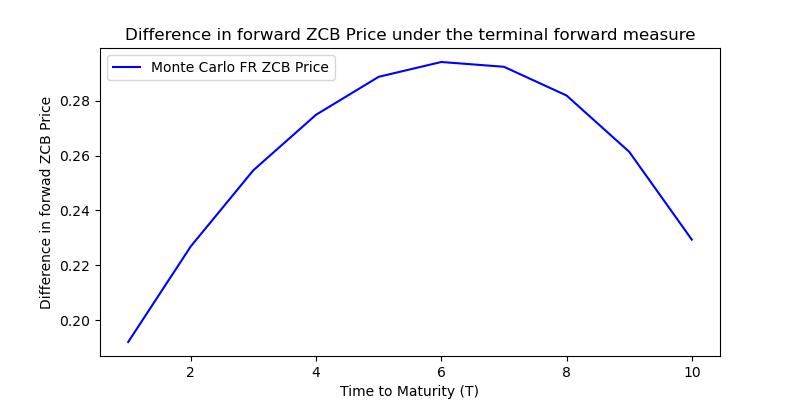

In [10]:
ZCB_M_1 = ZCB_M(CFM3D[-2,:,:], lenCFM-1)
print("P(T_k, T_M-1)=", np.mean(ZCB_M_1, axis = 1))
print("P(T_k,T_M-1, T_M)=", np.mean(ZCB_M_test[1:,:]/ZCB_M_1, axis=1))
print("True P(T_k, T_M-1, T_M)=", CFM_mean[-1,:])

print("Difference=", CFM_mean[-1,:-1]-np.mean(ZCB_M_test[1:,:]/ZCB_M_1, axis=1))

plt.figure(figsize=(8, 4))
plt.plot(range(1, ZCB_M_test.shape[0]), CFM_mean[-1,:-1]-np.mean(ZCB_M_test[1:,:]/ZCB_M_1, axis=1), label='Monte Carlo FR ZCB Price', color="blue")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Difference in forwad ZCB Price')
plt.title('Difference in forward ZCB Price under the terminal forward measure')
plt.legend()
plt.show()

Simulated caplet price = [0.12269553494823529, 0.1564305548468599, 0.1608815185986475, 0.15085723603354786, 0.13659897940421026, 0.11882991150701563, 0.10545341230521212, 0.09388934046258224, 0.08844773708489403, 0.08974983913879304]
cap sim price = 1.2238340643299976
BS caplet price = [0.040089754593390294, 0.05490816636082363, 0.06518715751504421, 0.07298549327915989, 0.0791326348936562, 0.08407047686311203, 0.08807142739971265, 0.09131944715453871, 0.09394678100133343, 0.09605291338244419]
BS cap price = 0.7657642524432151
Difference cap= [-0.08260578 -0.10152239 -0.09569436 -0.07787174 -0.05746634 -0.03475943
 -0.01738198 -0.00256989  0.00549904  0.00630307]


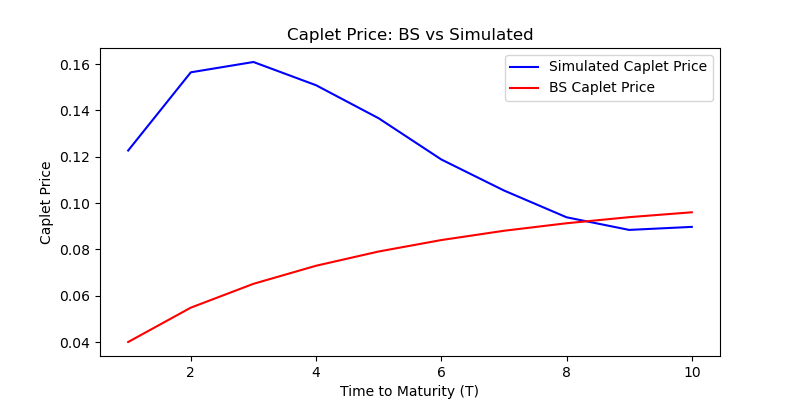

In [11]:
def sim_caplet(CFM, K, t_0, k, ZCB_mc):#is used in ZCB_mc if t_0 \neq 0
    tau = 1
    # Payoff based on ZCB at T_{k-1} for maturity T_k
    SPi =  1/CFM[k,k,:]
    KPi = (1 + K*tau)
    payoff = np.maximum(SPi - KPi, 0)
    caplet_price = np.mean(ZCB_mc[-1,:] )/tau*np.mean(payoff/ZCB_M_test[k,:])
    return caplet_price

sim_caplet_res = []
for i in range(1,lenCFM):
    sim_caplet_res.append(sim_caplet(CFM3D, 0.03, 0, i, ZCB_mc)) 
print("Simulated caplet price =", sim_caplet_res)
print("cap sim price =", sum(sim_caplet_res))

def BS(L,K,T,sigma): #BS pricing fomula
    d1 = (np.log(L/K)+ 0.5*sigma)/(np.sqrt(sigma))
    d2 = d1 - np.sqrt(sigma)
    return L*norm.cdf(d1)- K*norm.cdf(d2)

def caplet(L,K,T,sigma, ZCB): #BS price of a caplet
    tau = 1
    SPi = 1/L #ZCB[T-1]/ZCB[T]
    KPi =(1 + K*tau)
    VPI = tau**2 * sigma**2 * T
    
    return (ZCB[T] / tau) * BS(SPi, KPi, T, VPI)  

BS_caplet = [] #np.zeros((lenCFM-1, len(CFM3D[0,0,:])))
for i in range(1,lenCFM):
    BS_caplet.append(caplet(CFM_mean[i,0], 0.03, i, FR_vol[i], ZCB_mean)) # t=0
print("BS caplet price =", BS_caplet)
print("BS cap price =", sum(BS_caplet))


#print("Difference=", np.array(BS_caplet) - np.array(sim_caplet))
print("Difference cap=", np.array(BS_caplet)-np.array(sim_caplet_res)) 

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(sim_caplet_res) + 1), sim_caplet_res, label='Simulated Caplet Price', color="blue")
plt.plot(range(1, len(BS_caplet) + 1), BS_caplet, label='BS Caplet Price', color="red")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Caplet Price')
plt.title('Caplet Price: BS vs Simulated')
plt.legend()
plt.show()

Implied volatility= [0.39418377 0.29565254 0.23312706 0.18819392 0.15068726 0.1256736
 0.10666249 0.09682904 0.0954929 ]
Difference in IV and FR vol= [-2941.83773779 -1956.52537558 -1331.27055886  -881.93920105
  -506.87261332  -256.7360444    -66.62486959    31.70957373
    45.07103175]


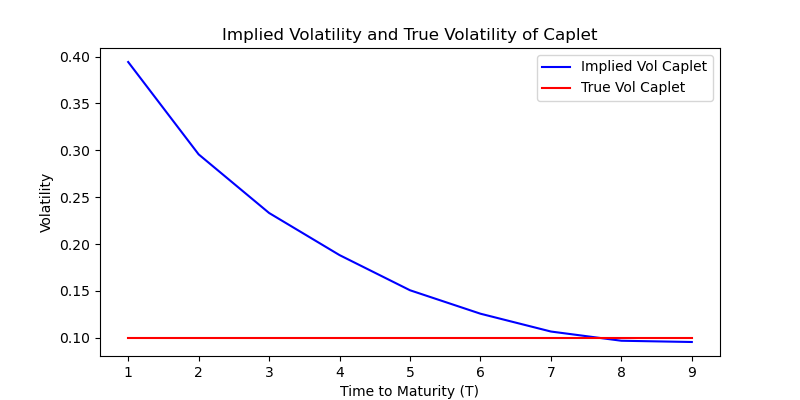

In [12]:
def imp_vol_bach_to_BS_updated(L, K, T, dis, market_price):
    try:
        sigma_black = brentq(lambda sigma: caplet(L,K,T,sigma, dis) - market_price, 1e-8, 1.0)
        return sigma_black
    except ValueError:
        return   # Return 0 if no root is found

implied_vol = np.zeros(len(sim_caplet_res)-1)
for i in range(1,len(sim_caplet_res)):
    market_price = sim_caplet_res[i]
    implied_vol[i-1] = imp_vol_bach_to_BS_updated(CFM_mean[i,0], 0.03, i, ZCB_mean, market_price)
    
#print(len(sim_caplet), Libor_mean.shape, len(implied_vol))
print("Implied volatility=", implied_vol)

print("Difference in IV and FR vol=", (FR_vol[1:len(implied_vol)+1]-implied_vol)*10000)

#Plot of the volatility
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(implied_vol) + 1), implied_vol, label='Implied Vol Caplet', color="blue")
plt.plot(range(1, len(implied_vol) + 1), FR_vol[1:len(implied_vol) + 1], label='True Vol Caplet', color="red")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Volatility')
plt.title('Implied Volatility and True Volatility of Caplet')
plt.legend()
plt.xticks(range(1, len(implied_vol) + 1))  # Ensure x-axis ticks start at 1
plt.show()

In [13]:
#Swaptions MC
def swaptionMC(CFM, ZCB, k, n):
    K_ATM = (1-ZCB[k+n,:])*sum(tau * ZCB[i,:] for i in range(k+n+1))
    payoff = np.mean((np.maximum(1- ZCB_M_test[k,:] - K_ATM*tau*sum(ZCB_M_test[i,:] for i in range(k+1, k+n+1)), 0))*ZCB_M_test[k,:])
    return np.mean(ZCB[k,:])*payoff


In [14]:
def swaption_price_matrix(CFM, ZCB, max_index):
    # Initialize the swaption price matrix
    swaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        #print(alpha)
        for beta in range(1,max_index):
                swaption_matrix[alpha-1, beta-1] = swaptionMC(CFM, ZCB, alpha, beta)

    return swaption_matrix

# Example usage
max_index = int(timetoend/2) # 5x5
swaption_prices = swaption_price_matrix(CFM3D, ZCB_mc, max_index)
print("Swaption Price Matrix size:", swaption_prices.shape)
print("Swaption Price Matrix:", swaption_prices)

Swaption Price Matrix size: (5, 5)
Swaption Price Matrix: [[4.74164928e-02 2.69280815e-02 1.17556349e-02 4.32417096e-03
  1.33999136e-03]
 [3.73112021e-02 1.71192939e-02 6.27787809e-03 1.88150270e-03
  4.34001685e-04]
 [2.81707850e-02 1.02914148e-02 2.98618801e-03 6.56213818e-04
  8.38201969e-05]
 [2.02479745e-02 5.59207933e-03 1.14608013e-03 1.37268442e-04
  4.15194087e-06]
 [1.34998672e-02 2.47330105e-03 2.69875803e-04 7.44409402e-06
  6.25781273e-10]]


In [15]:
#Swaption BS
def swaptionBS(CFM, ZCB, sigma, k, n):
    tau = 1
    sigmajn = (-sum(sigma[k-1,j]*tau for j in range(n)))**2
    K_ATM = (1-ZCB[k+n]) * sum(tau * ZCB[i] for i in range(k+n+1))
    BC = ZCB[k+n] / ZCB[k] + K_ATM * sum(ZCB[i]/ZCB[k]*tau for i in range(k+1, k+n+1))
    d1 = (np.log(BC)+0.5*sigmajn *k)/(np.sqrt(sigmajn*k))
    d2 = d1 - np.sqrt(sigmajn*k)
    return ZCB[k]* (norm.cdf(-d2)-BC*norm.cdf(-d1)) 

def swaption_priceBS(CFM, ZCB, sigma, max_index):
    # Initialize the swaption price matrix
    swaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        #print(alpha)
        for beta in range(1,max_index):
                swaption_matrix[alpha-1, beta-1] = swaptionBS(CFM, ZCB, sigma, alpha, beta)

    return swaption_matrix

# Example usage
FR_vol_matrix = np.zeros_like(swaption_prices) + FR_vol[0]
max_index = int(timetoend/2) # 5x5
swaptionpricesBS = swaption_priceBS(CFM_mean, ZCB_mean, FR_vol_matrix, max_index)
print("Swaption Price Matrix size:", swaptionpricesBS.shape)
print("Swaption Price Matrix:", swaptionpricesBS)

Swaption Price Matrix size: (5, 5)
Swaption Price Matrix: [[5.04742002e-03 9.96660195e-04 2.07119477e-04 8.81784544e-05
  7.20479719e-05]
 [2.15143207e-03 1.06619412e-03 8.00371547e-04 9.32522982e-04
  1.39349946e-03]
 [7.18954882e-04 8.12249523e-04 1.25941208e-03 2.31122842e-03
  4.39526218e-03]
 [2.28066907e-04 6.08756692e-04 1.60385360e-03 3.89162399e-03
  8.45634943e-03]
 [7.52785279e-05 4.76996374e-04 1.89869338e-03 5.57437400e-03
  1.31565173e-02]]


In [16]:
def bootstrap_implied_vols(CFM, ZCB, max_index, swaption_matrix):
    """Bootstraps volatilities in financial order"""
    sigma_matrix = np.zeros((max_index, max_index))
    results = np.zeros((max_index, max_index))
    
    # Process diagonally by termination date
    for diag in range(1, 2*max_index):
        for alpha in range(1, max_index+1):
            beta = diag - alpha + 1
            if 1 <= beta <= max_index:
                try:
                    market_price = swaption_matrix[alpha-1, beta-1]
                    
                    # Objective function for root finding
                    def objective(sigma):
                        temp_matrix = sigma_matrix.copy()
                        temp_matrix[alpha-1, beta-1] = sigma
                        return swaptionBS(CFM, ZCB, temp_matrix, alpha, beta) - market_price
                    
                    # Solve with financial bounds
                    sigma_solved = brentq(objective, 1e-8, 2.0, maxiter=1000)
                    sigma_matrix[alpha-1, beta-1] = sigma_solved
                    results[alpha-1, beta-1] = sigma_solved
                
                except ValueError:
                    results[alpha-1, beta-1] = 0
    
    return results


max_index = int(timetoend/2-1)
IV_matrix = bootstrap_implied_vols(CFM_mean, ZCB_mean, max_index, swaption_prices)
print("Implied volatility matrix:")
print(IV_matrix)

Implied volatility matrix:
[[0.24168641 0.14148516 0.11961644 0.0831048  0.05017792]
 [0.21734638 0.10044071 0.07030238 0.04212508 0.01977483]
 [0.21050111 0.0764836  0.04449354 0.02129974 0.00108287]
 [0.20521449 0.05783733 0.02652926 0.00488606 0.        ]
 [0.19801043 0.04095686 0.01099039 0.         0.        ]]


In [17]:
def BSswaption_matrix(CFM, sigma, ZCB, max_index):
    # Initialize the swaption price matrix
    swaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        for beta in range(1,max_index):
                swaption_matrix[alpha-1, beta-1] = swaptionBS(CFM, ZCB, sigma, alpha, beta)

    return swaption_matrix

# Example usage
max_index = int(timetoend/2) # 10x10
swaption_pricesBS = BSswaption_matrix(CFM_mean, IV_matrix, ZCB_mean, max_index)
print("Swaption Price Matrix:", swaption_prices)

print("Difference Swaption pricing =")
print(swaption_prices-swaption_pricesBS)

Swaption Price Matrix: [[4.74164928e-02 2.69280815e-02 1.17556349e-02 4.32417096e-03
  1.33999136e-03]
 [3.73112021e-02 1.71192939e-02 6.27787809e-03 1.88150270e-03
  4.34001685e-04]
 [2.81707850e-02 1.02914148e-02 2.98618801e-03 6.56213818e-04
  8.38201969e-05]
 [2.02479745e-02 5.59207933e-03 1.14608013e-03 1.37268442e-04
  4.15194087e-06]
 [1.34998672e-02 2.47330105e-03 2.69875803e-04 7.44409402e-06
  6.25781273e-10]]
Difference Swaption pricing =
[[ 0.00000000e+00  1.38777878e-17  1.38777878e-17 -8.67361738e-19
   8.46588424e-15]
 [ 1.94289029e-16 -1.03483194e-13  7.80625564e-17  6.28837260e-18
   9.37834879e-18]
 [-1.07552856e-16  3.12770643e-15  1.30104261e-18  9.94213392e-17
  -4.87890978e-19]
 [ 2.22738494e-15  1.12757026e-17 -8.67361738e-19 -1.89735380e-19
  -9.12018125e-06]
 [ 6.93889390e-17 -1.73472348e-18  3.74049750e-18 -1.14220798e-05
  -1.32482223e-06]]


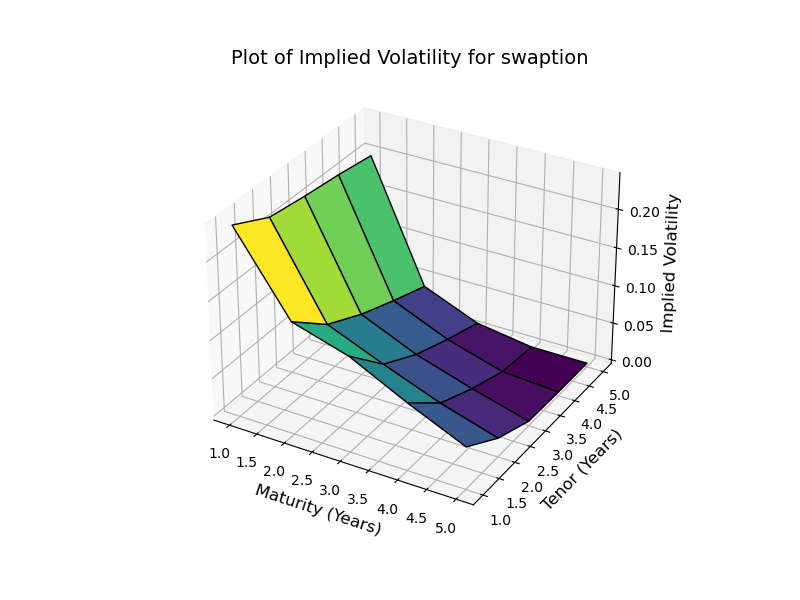

In [18]:
# Setting up the grid for maturities and tenors
maturities = np.arange(1, IV_matrix.shape[0] +1)
tenors = np.arange(1, IV_matrix.shape[1] +1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, IV_matrix, cmap='viridis', edgecolor='k') #skal imp

# Adding labels and title
ax.set_title('Plot of Implied Volatility for swaption', fontsize=14)
ax.set_xlabel('Maturity (Years)', fontsize=12)
ax.set_ylabel('Tenor (Years)', fontsize=12)
ax.set_zlabel('Implied Volatility', fontsize=12)

plt.show()

In [19]:
#MCerr
def MCerr(CFM, ZCB, k, n):
    K_ATM = (1-ZCB[k+n,:])*sum(tau * ZCB[i,:] for i in range(k+n+1))
    payoff = ZCB_M_test[k,:]*np.maximum(1- ZCB_M_test[k,:] - K_ATM*tau*sum(ZCB_M_test[i,:] for i in range(k+1, k+n+1)), 0)
    return 2.33*np.std(ZCB[k,:]*payoff)/np.sqrt(CFM.shape[2])

def swaption_MCerr_matrix(CFM, ZCB, max_index):
    # Initialize the swaption price matrix
    swaption_matrix = np.zeros((max_index-1, max_index-1))

    for alpha in range(1,max_index):
        #print(alpha)
        for beta in range(1,max_index):
                #print(beta)
                swaption_matrix[alpha-1, beta-1] = MCerr(CFM, ZCB, alpha, beta)

    return swaption_matrix

# Example usage
max_index = int(timetoend/2) # 5x5
swaption_MCerr = swaption_MCerr_matrix(CFM3D, ZCB_mc, max_index)
print("98% Swaption Price Error Matrix:", swaption_MCerr)

98% Swaption Price Error Matrix: [[3.81281380e-04 2.47226418e-04 1.32492872e-04 6.27785479e-05
  2.65677967e-05]
 [3.16998573e-04 1.75995789e-04 8.32068430e-05 3.43611383e-05
  1.18784564e-05]
 [2.56188245e-04 1.21204397e-04 4.87636388e-05 1.63157360e-05
  3.77651598e-06]
 [2.01723298e-04 7.86502212e-05 2.51251068e-05 5.58041357e-06
  5.12238646e-07]
 [1.52502614e-04 4.53240190e-05 9.51806870e-06 8.25274588e-07
  1.08524934e-09]]


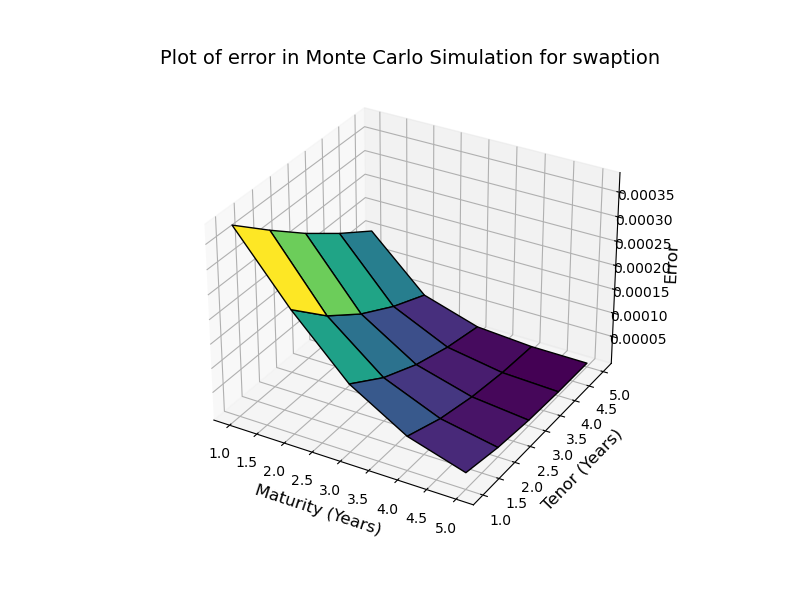

In [20]:
# Setting up the grid for maturities and tenors
maturities = np.arange(1, IV_matrix.shape[0] +1)
tenors = np.arange(1, IV_matrix.shape[1] +1)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(maturities, tenors)

# Plotting the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, swaption_MCerr, cmap='viridis', edgecolor='k') #skal imp

# Adding labels and title
ax.set_title('Plot of error in Monte Carlo Simulation for swaption', fontsize=14)
ax.set_xlabel('Maturity (Years)', fontsize=12)
ax.set_ylabel('Tenor (Years)', fontsize=12)
ax.set_zlabel('Error', fontsize=12)

plt.show()

In [21]:
swaption_upper = swaption_prices + swaption_MCerr
max_index = int(timetoend/2-1)
IV_matrix_upper = bootstrap_implied_vols(CFM_mean, ZCB_mean, max_index, swaption_upper)
print("Implied volatility matrix upper bound:")
print(IV_matrix_upper)
print("Implied volatility matrix:")
print(IV_matrix)
swaption_lower = swaption_prices - swaption_MCerr
IV_matrix_lower = bootstrap_implied_vols(CFM_mean, ZCB_mean, max_index, swaption_lower)
print("Implied volatility matrix lower bound:")
print(IV_matrix_lower)

Implied volatility matrix upper bound:
[[0.24275403 0.14145607 0.1196389  0.08317158 0.05030942]
 [0.21809469 0.1004359  0.07033533 0.0422059  0.01992978]
 [0.21111223 0.07649352 0.04454374 0.02141461 0.0013389 ]
 [0.20574801 0.05786296 0.02661463 0.00509102 0.        ]
 [0.19849547 0.04101222 0.01115495 0.         0.        ]]
Implied volatility matrix:
[[0.24168641 0.14148516 0.11961644 0.0831048  0.05017792]
 [0.21734638 0.10044071 0.07030238 0.04212508 0.01977483]
 [0.21050111 0.0764836  0.04449354 0.02129974 0.00108287]
 [0.20521449 0.05783733 0.02652926 0.00488606 0.        ]
 [0.19801043 0.04095686 0.01099039 0.         0.        ]]
Implied volatility matrix lower bound:
[[0.24061755 0.14151165 0.11959098 0.08303379 0.05003882]
 [0.21659636 0.1004434  0.0702667  0.04203947 0.01960936]
 [0.20988793 0.07647152 0.04443995 0.02117738 0.00080264]
 [0.20467857 0.05780909 0.02643839 0.00466326 0.        ]
 [0.19752254 0.04089745 0.01081289 0.         0.        ]]


In [22]:
'''
Implied volatility matrix upper:
[[0.74378157 0.19757572 0.20309382 0.16756796 0.13102946 0.10119077
  0.07855455 0.06045503 0.04551003 0.03390846 0.02327324]
 [0.58312346 0.15796871 0.13473112 0.10483795 0.07998718 0.06132742
  0.0470342  0.03521245 0.02626659 0.01821173 0.01053433]
 [0.52157637 0.13444981 0.10204109 0.07587516 0.05689812 0.04308152
  0.03211257 0.0238096  0.01669179 0.00998812 0.00352718]
 [0.4873923  0.11669001 0.08147275 0.05849467 0.04317578 0.03176797
  0.02332341 0.01647386 0.01018059 0.0042832  0.        ]
 [0.46371825 0.10246772 0.06695492 0.04681817 0.03352417 0.02418397
  0.01709283 0.01087748 0.00519317 0.         0.        ]
 [0.44488618 0.09057827 0.05608037 0.03803231 0.02654872 0.0185506
  0.01204845 0.00628614 0.00053855 0.         0.        ]
 [0.42852061 0.08032925 0.04751634 0.03119209 0.02117125 0.01380399
  0.00769937 0.00192868 0.         0.         0.        ]
 [0.41333145 0.07143389 0.04038018 0.02577698 0.01653927 0.00962622
  0.00355378 0.         0.         0.         0.        ]
 [0.39865065 0.06350309 0.03450815 0.02103282 0.01239693 0.00559685
  0.         0.         0.         0.         0.        ]
 [0.38414108 0.05631821 0.02938197 0.01668896 0.00841197 0.00162355
  0.         0.         0.         0.         0.        ]
 [0.36934882 0.04987523 0.0245423  0.01265846 0.00433548 0.
  0.         0.         0.         0.         0.        ]]
Implied volatility matrix:
[[0.74148554 0.19768392 0.20313875 0.16757614 0.13102135 0.10117412
  0.07853373 0.06043146 0.04548156 0.03387791 0.0232404 ]
 [0.58154504 0.15802517 0.13474675 0.10483616 0.07997715 0.06131318
  0.04701807 0.03519244 0.02624487 0.01818819 0.01050772]
 [0.52031513 0.13448114 0.10204533 0.07586928 0.05688722 0.04306852
  0.03209658 0.02379159 0.01667236 0.00996599 0.00350167]
 [0.48631796 0.11670667 0.08147133 0.05848644 0.04316482 0.03175428
  0.0233075  0.01645674 0.01016112 0.00426083 0.        ]
 [0.46276977 0.10247544 0.06694989 0.04680879 0.03351203 0.0241694
  0.01707705 0.01085976 0.00517281 0.         0.        ]
 [0.44402969 0.09058008 0.05607281 0.03802156 0.0265352  0.01853566
  0.01203183 0.00626693 0.00051454 0.         0.        ]
 [0.42773548 0.08032664 0.04750681 0.0311794  0.02115686 0.0137879
  0.00768086 0.00190592 0.         0.         0.        ]
 [0.41260407 0.07142771 0.04036812 0.02576284 0.01652342 0.00960811
  0.00353185 0.         0.         0.         0.        ]
 [0.39797145 0.06349353 0.0344938  0.02101682 0.01237885 0.00557539
  0.         0.         0.         0.         0.        ]
 [0.38350333 0.0563049  0.02936537 0.01667021 0.00839066 0.00159711
  0.         0.         0.         0.         0.        ]
 [0.36874719 0.04985814 0.02452237 0.01263661 0.00430866 0.
  0.         0.         0.         0.         0.        ]]
Implied volatility matrix lower:
[[0.73919027 0.1977913  0.20318264 0.16758333 0.13101232 0.10115659
  0.07851205 0.06040703 0.04545215 0.03384635 0.02320643]
 [0.57996693 0.15808087 0.13476163 0.10483369 0.07996647 0.06129832
  0.04700131 0.03517175 0.02622241 0.01816385 0.01048017]
 [0.51905392 0.13451178 0.10204896 0.07586283 0.05687579 0.04305499
  0.03208002 0.02377298 0.01665226 0.00994309 0.00347521]
 [0.48524343 0.11672269 0.08146936 0.05847771 0.04315337 0.03174009
  0.02329106 0.01643903 0.01014097 0.00423765 0.        ]
 [0.46182095 0.10248256 0.06694436 0.04679895 0.03349943 0.02415434
  0.01706074 0.01084143 0.0051517  0.         0.        ]
 [0.44317273 0.09058131 0.05606476 0.03801034 0.0265212  0.01852021
  0.01201463 0.00624704 0.00048965 0.         0.        ]
 [0.42694976 0.08032345 0.04749679 0.03116624 0.02114198 0.01377127
  0.0076617  0.00188234 0.         0.         0.        ]
 [0.41187599 0.07142096 0.04035557 0.02574821 0.01650703 0.00958938
  0.00350915 0.         0.         0.         0.        ]
 [0.39729147 0.06348337 0.03447894 0.02100029 0.01236016 0.00555319
  0.         0.         0.         0.         0.        ]
 [0.3828647  0.05629097 0.0293482  0.01665086 0.00836862 0.00156972
  0.         0.         0.         0.         0.        ]
 [0.36814458 0.04984039 0.02450181 0.01261405 0.0042809  0.
  0.         0.         0.         0.         0.        ]]
  '''

'\nImplied volatility matrix upper:\n[[0.74378157 0.19757572 0.20309382 0.16756796 0.13102946 0.10119077\n  0.07855455 0.06045503 0.04551003 0.03390846 0.02327324]\n [0.58312346 0.15796871 0.13473112 0.10483795 0.07998718 0.06132742\n  0.0470342  0.03521245 0.02626659 0.01821173 0.01053433]\n [0.52157637 0.13444981 0.10204109 0.07587516 0.05689812 0.04308152\n  0.03211257 0.0238096  0.01669179 0.00998812 0.00352718]\n [0.4873923  0.11669001 0.08147275 0.05849467 0.04317578 0.03176797\n  0.02332341 0.01647386 0.01018059 0.0042832  0.        ]\n [0.46371825 0.10246772 0.06695492 0.04681817 0.03352417 0.02418397\n  0.01709283 0.01087748 0.00519317 0.         0.        ]\n [0.44488618 0.09057827 0.05608037 0.03803231 0.02654872 0.0185506\n  0.01204845 0.00628614 0.00053855 0.         0.        ]\n [0.42852061 0.08032925 0.04751634 0.03119209 0.02117125 0.01380399\n  0.00769937 0.00192868 0.         0.         0.        ]\n [0.41333145 0.07143389 0.04038018 0.02577698 0.01653927 0.00962622\